In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston["data"]

In [5]:
feature_names = boston["feature_names"]

In [6]:
X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
target = boston["target"]

In [8]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score

In [15]:
y_pred = lr.predict(X_test)

In [16]:
r2_score(y_test, y_pred)

0.711226005748496

In [17]:
from sklearn.ensemble import RandomForestRegressor as RFR
model = RFR(n_estimators=1000, max_depth=12, random_state=42)

In [18]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [19]:
y_pred1 = model.predict(X_test)

In [20]:
r2_score(y_test, y_pred1)

0.87472606157312

In [21]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
    "y_pred1": y_pred.flatten()
})

check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head(10)

,y_test,y_pred,y_pred1,error
173,23.6,28.648960,28.648960,5.048960
274,32.4,36.495014,36.495014,4.095014
491,13.6,15.411193,15.411193,1.811193
72,22.8,25.403213,25.403213,2.603213
452,16.1,18.855280,18.855280,2.755280
76,20.0,23.146689,23.146689,3.146689
316,17.8,17.392124,17.392124,-0.407876
140,14.0,14.078599,14.078599,0.078599
471,19.6,23.036927,23.036927,3.436927
500,16.8,20.599433,20.599433,3.799433


In [22]:
f_model = model.feature_importances_
f1_model = np.sort(f_model)
print(f'Сумма всех признаков: {f_model.sum()}\nПоказатели признаков:\n{f_model}')

Сумма всех признаков: 1.0
Показатели признаков:
[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]


In [23]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

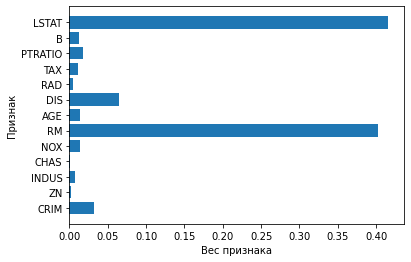

In [24]:
plt.barh(feature_names, f_model)

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [25]:
important_features = [
    feature
    for feature, weight in zip(feature_names, f_model)
    if np.abs(weight) > 0.1
]

print(important_features)

['RM', 'LSTAT']


In [26]:
df_model = pd.DataFrame({'feature_names':feature_names,'important': f_model}, columns=['feature_names','important'])
df_model.nlargest(2, 'important')

,feature_names,important
12,LSTAT,0.415847
5,RM,0.402682


In [30]:
f1_model[-2:].sum()

0.8185291038949476

In [31]:
print(df_model.nlargest(2, 'important').sum()['important'])

0.8185291038949476
